## Prompts for locations

In [1]:
location_prompts = [
    "steampunk city with skyscrapers",
    "cyberpunk village in Japanese rustic style",
    "fantasy dungeons and dragons",
    "noir city from 1930s",
    "StarTrek inspired spaceship",
    "undeground mine of goblins",
    "SuperMario style magic land plain",
    "SuperMario style magic land beach",
]

## Generating locations 

In [2]:
from holodeck import initialize_location
from holodeck import generate_location_and_encounters

from tqdm.notebook import tqdm

locations = []

for p in tqdm(location_prompts, desc="Generating locations"):
    location_dict, encounters_list = generate_location_and_encounters(p)
    if location_dict:
        location = initialize_location(location_dict, encounters_list)
        locations.append(location)


locations

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


Generating locations:   0%|          | 0/8 [00:00<?, ?it/s]

>

```
name: Steampunk Skyscraper City
description: 'A steampunk cityscape with imposing skyscrapers and clock towers. The cobblestone streets are bustling with airships, carriages, and dirigibles. The whole city is buzzing with energy and excitement.

The clock tower in the center of town is especially impressive, with spinning gears and clockwork mechanisms powering the nearby contraptions.'
buildings:
- description: An impressive clock tower that is the centerpiece of town.
  enterable: true
  name: Clock Tower
- description: A number of sky-scraping buildings that give the city a futuristic feel.
  enterable: true
  name: Skyscrapers
ways:
- description: A cobblestone street leading North.
  name: North Road
- description: A cobblestone street leading South.
  name: South Road
- description: A cobblestone street leading West.
  name: West Road
- description: A cobblestone street leading East.
  name: East Road
```

<
{'name': 'Steampunk Skyscraper City', 'description': 'A steampunk

KeyError: 'buildings'

## Generate Image Prompts

In [ ]:
from holodeck.gpt_text import \
        generate_object_image_prompt, \
        generate_building_image_prompt, \
        generate_location_image_prompt

locations_prompts = []
objects_image_prompts = []
buildings_image_prompts = []

for location in tqdm(locations, desc="Locations"):

    locations_prompts.append((location, generate_location_image_prompt(location)))

    for o in tqdm(location.objects, desc="Objects"):
        objects_image_prompts.append((o, generate_object_image_prompt(o, location)))


    for b in tqdm(location.objects, desc="Buildings"):
        objects_image_prompts.append((b, generate_building_image_prompt(o, location)))




Locations:   0%|          | 0/5 [00:00<?, ?it/s]

Objects: 0it [00:00, ?it/s]

Buildings: 0it [00:00, ?it/s]

Objects: 0it [00:00, ?it/s]

Buildings: 0it [00:00, ?it/s]

Objects: 0it [00:00, ?it/s]

Buildings: 0it [00:00, ?it/s]

Objects: 0it [00:00, ?it/s]

Buildings: 0it [00:00, ?it/s]

Objects: 0it [00:00, ?it/s]

Buildings: 0it [00:00, ?it/s]

## Generate Images

Images:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

### Steampunk City


An aerial photograph of a bustling steampunk city with a Steampunk Skyscraper and an Ornate Townhouse during nightfall with low-light lens — at 16:9. nvinkpunk

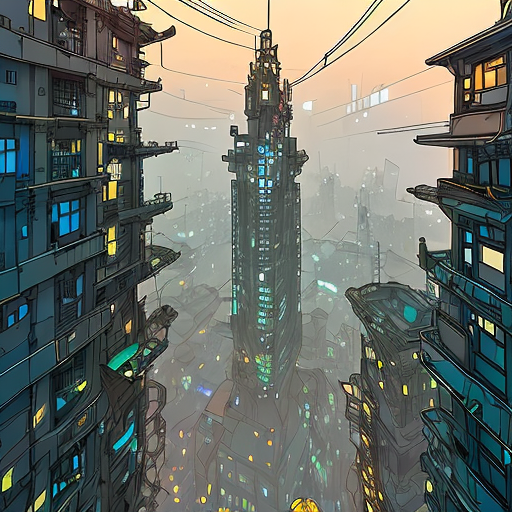

  0%|          | 0/50 [00:00<?, ?it/s]

### Cyberpunk Village in Japanese Rustic Style

An aerial photograph of a vibrant urban village with Ramen Heaven, Izanami & Izanagi Shrine, and Ancient Tree during night-time with flash lighting using a telephoto lens — at 16:9.

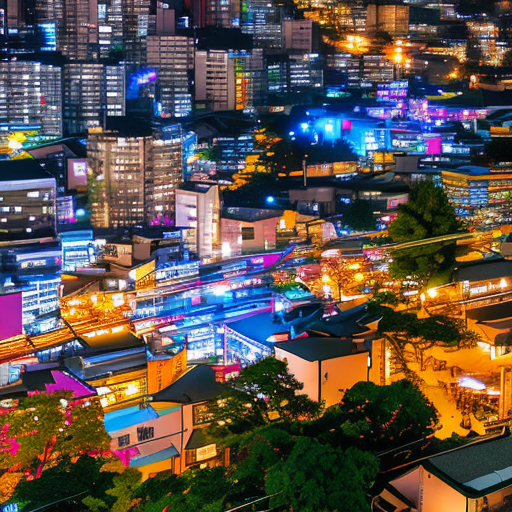

  0%|          | 0/50 [00:00<?, ?it/s]

### Noir City from 1930s


An aerial photograph of a cityscape with Grand Theater, Tall Rise, and Speakeasy during nightfall with long exposure lens — at 16:9. nvinkpunk

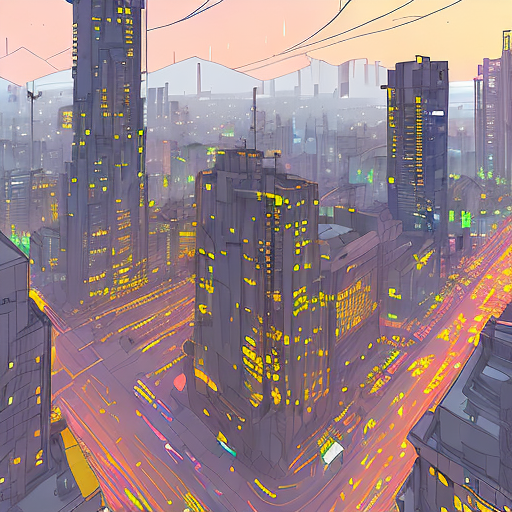

  0%|          | 0/50 [00:00<?, ?it/s]

### Magical Plains of Mario


An aerial photograph of the Mario Plains with The Mushroom Castle and The Warp Pipe during midday with natural light using a telephoto lens — at 16:9. nvinkpunk

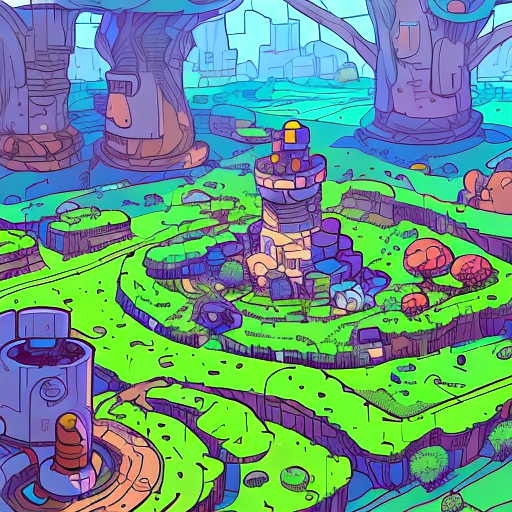

  0%|          | 0/50 [00:00<?, ?it/s]

### Magic Land Beach

An aerial photograph of a beach with Magic Land Castle, Rainbow Bridge, Magic Oasis, and Mysterious Mountain Staircase during Sunrise with a Fish-Eye lens — at 16:9. nvinkpunk

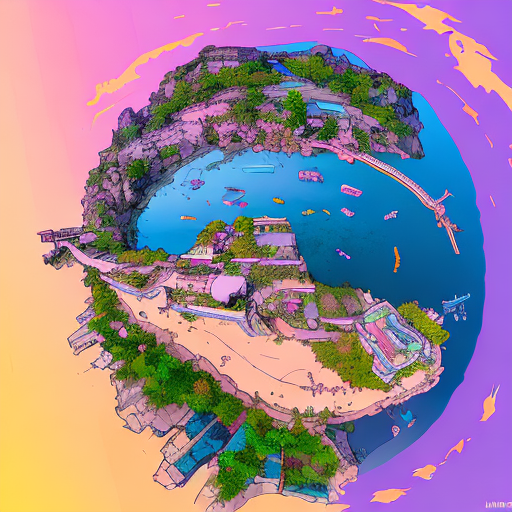

5

In [ ]:
from holodeck.gpt_image import generate_image
from IPython.display import display, Markdown

img_prompts = locations_prompts + objects_image_prompts + buildings_image_prompts

images = []

for obj, prompt in tqdm(img_prompts, desc="Images"):
    image = generate_image(prompt)
    display(Markdown(f"### {obj.name}"))
    display(Markdown(prompt))
    display(image)
    image_file_name = f".images/{obj.name}.jpg"
    image.save(image_file_name)
    images.append((obj, prompt, image_file_name))

len(images)


## Display Images

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import PIL.Image as Image


# define the grid layout
grid = widgets.GridBox(
    layout=widgets.Layout(
        grid_template_columns="repeat(4, 1fr)",
        grid_gap="10px"
    )
)

# loop through the data and create a widget for each tuple
for i, (obj, text, img_path) in enumerate(images):
    with open(img_path, 'rb') as f:
        image = f.read()
        img_widget = widgets.Image(value=image, format="jpg", width=150, height=150)
    obj_widget = widgets.HTML(f'<h3 style="font-size: 9px; line-height: 1.0;">{obj.name}</h3>')
    text_widget = widgets.HTML(f'<p style="font-size: 8px; line-height: 1.0;">{text}</p>')
    item = widgets.VBox([img_widget, obj_widget, text_widget])
    grid.children += (item,)
    
# display the grid
display(grid)


GridBox(children=(VBox(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x0…